In [1]:
import torch
import torch.nn as nn
from torch import optim
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,Subset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

full_train_dataset=datasets.MNIST(root='data',train=True,download=True,transform=transform)
full_test_dataset=datasets.MNIST(root='data',train=False,download=True,transform=transform)

train_subset=Subset(full_train_dataset,torch.arange(5000))
test_subset=Subset(full_test_dataset,torch.arange(1000))

In [3]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [4]:
train_loader=DataLoader(train_subset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_subset,batch_size=64,shuffle=True)

In [5]:
data=iter(train_loader)
images,labels=next(data)
images[0].squeeze().shape

torch.Size([28, 28])

In [6]:
labels.shape

torch.Size([64])

In [7]:
labels

tensor([2, 4, 8, 7, 7, 0, 3, 0, 5, 1, 3, 0, 4, 2, 6, 0, 6, 0, 9, 8, 8, 9, 4, 8,
        0, 8, 5, 6, 0, 1, 0, 5, 6, 0, 8, 0, 5, 2, 2, 3, 0, 9, 6, 6, 8, 6, 1, 0,
        7, 7, 2, 6, 8, 3, 0, 6, 9, 5, 4, 7, 3, 0, 3, 8])

In [8]:
def trainer(model,train_loader,test_loader,optimizer,criterion,epochs=20):
    model.train()
    train_val,test_val,accuracies=[],[],[]

    for epoch in range(epochs):
        running_loss=0.0
        for images,labels in train_loader:
            outputs=model(images)
            loss=criterion(outputs,labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        train_val.append(running_loss/len(train_loader))
    
        model.eval()
        val_loss=0.0
        y_pred,y_true=[],[]
    
        with torch.no_grad():
            for images,labels in test_loader:
                outputs=model(images)
                loss=criterion(outputs,labels)
                val_loss+=loss.item()
                _,predicted=torch.max(outputs,axis=1)
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())
        test_val.append(val_loss/len(test_loader))
        accuracy=accuracy_score(y_true,y_pred)
        accuracies.append(accuracy)

        print(f"Epochs:{epoch+1},\ttrain_loss:{train_val[-1]:.4f},\ttest_loss:{test_val[-1]:.4f},\taccuracy:{accuracies[-1]:.4f}")

    return  train_val,test_val,accuracies

In [9]:
model=MNISTClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [10]:
train_val,test_val,accuracies=trainer(model,train_loader,test_loader,optimizer,criterion)

Epochs:1,	train_loss:1.1684,	test_loss:0.6770,	accuracy:0.7910
Epochs:2,	train_loss:0.4568,	test_loss:0.4892,	accuracy:0.8560
Epochs:3,	train_loss:0.3411,	test_loss:0.4125,	accuracy:0.8720
Epochs:4,	train_loss:0.3016,	test_loss:0.3818,	accuracy:0.8860
Epochs:5,	train_loss:0.2670,	test_loss:0.3801,	accuracy:0.8700
Epochs:6,	train_loss:0.2577,	test_loss:0.3622,	accuracy:0.8980
Epochs:7,	train_loss:0.2222,	test_loss:0.3746,	accuracy:0.8730
Epochs:8,	train_loss:0.2133,	test_loss:0.3407,	accuracy:0.8920
Epochs:9,	train_loss:0.1919,	test_loss:0.3090,	accuracy:0.9020
Epochs:10,	train_loss:0.1644,	test_loss:0.3063,	accuracy:0.9050
Epochs:11,	train_loss:0.1525,	test_loss:0.2913,	accuracy:0.9090
Epochs:12,	train_loss:0.1546,	test_loss:0.3225,	accuracy:0.8940
Epochs:13,	train_loss:0.1326,	test_loss:0.3127,	accuracy:0.9020
Epochs:14,	train_loss:0.1177,	test_loss:0.3708,	accuracy:0.8730
Epochs:15,	train_loss:0.1092,	test_loss:0.3116,	accuracy:0.9060
Epochs:16,	train_loss:0.1002,	test_loss:0.2783,	a

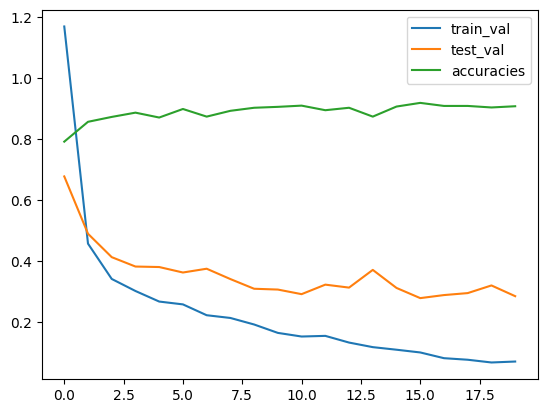

In [11]:
plt.plot(train_val,label="train_val")
plt.plot(test_val,label="test_val")
plt.plot(accuracies,label="accuracies")
plt.legend()
plt.show()

# With Batch Normalization

In [12]:
class MNISTClassifierwithBN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.BatchNormd1(128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.BatchNormd1(64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [13]:
model=MNISTClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()
train_val,test_val,bn_accuracies=trainer(model,train_loader,test_loader,optimizer,criterion)

Epochs:1,	train_loss:1.1914,	test_loss:0.6817,	accuracy:0.7960
Epochs:2,	train_loss:0.4630,	test_loss:0.5152,	accuracy:0.8370
Epochs:3,	train_loss:0.3584,	test_loss:0.4671,	accuracy:0.8680
Epochs:4,	train_loss:0.3118,	test_loss:0.4277,	accuracy:0.8750
Epochs:5,	train_loss:0.2811,	test_loss:0.4101,	accuracy:0.8640
Epochs:6,	train_loss:0.2510,	test_loss:0.3641,	accuracy:0.8900
Epochs:7,	train_loss:0.2319,	test_loss:0.3564,	accuracy:0.8880
Epochs:8,	train_loss:0.2122,	test_loss:0.3192,	accuracy:0.9070
Epochs:9,	train_loss:0.1982,	test_loss:0.3192,	accuracy:0.9020
Epochs:10,	train_loss:0.1942,	test_loss:0.3370,	accuracy:0.8930
Epochs:11,	train_loss:0.1594,	test_loss:0.3319,	accuracy:0.8960
Epochs:12,	train_loss:0.1536,	test_loss:0.2980,	accuracy:0.9040
Epochs:13,	train_loss:0.1506,	test_loss:0.3234,	accuracy:0.9070
Epochs:14,	train_loss:0.1228,	test_loss:0.2722,	accuracy:0.9070
Epochs:15,	train_loss:0.0957,	test_loss:0.2870,	accuracy:0.9110
Epochs:16,	train_loss:0.0909,	test_loss:0.2868,	a

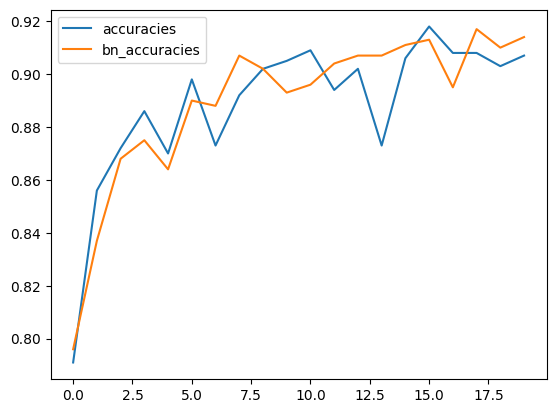

In [14]:
plt.plot(accuracies,label="accuracies")
plt.plot(bn_accuracies,label="bn_accuracies")
plt.legend()
plt.show()